crawling한 데이터를 확인합니다.  

<br></br>

ver2.  
변경사항: crawling 데이터 변경됨(news_df_210205_v03.xlsx → news_df_210222_v05.xlsx)  
데이터 정리하지 않음.  

# Import

## Import library

In [1]:
import os
import sys
import warnings
from tqdm import tqdm_notebook as tqdm 

import numpy as np
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

warnings.filterwarnings(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# 현재 jupyter 위치를 PROJECT_DIR 추가
PROJECT_DIR = os.path.abspath(os.path.join(os.path.realpath('__file__'), '..'))
sys.path.insert(0, PROJECT_DIR)
DATA_DIR = PROJECT_DIR + '/data' # 데이터 위치 
print(DATA_DIR)

D:\study\workspace_python\_project/data


## import

네이버 뉴스에서 크롤링한 뉴스데이터 엑셀파일을 사용하고자 합니다.  
- 'BTS' 또는 '방탄소년단'에 관한 2020년 전체 네이버 뉴스

In [3]:
# data_df = pd.read_excel(DATA_DIR +'/news_df_210205_v03.xlsx')
data_df = pd.read_excel(DATA_DIR +'/news_df_210222_v04.xlsx')
data_df.head(2)

,media,date,title,article_original,url
0,조선일보,2020-01-02,150만명 몰린 타임스스퀘어 새해 무대도 BTS,2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계전 지구를 홀린 그룹...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,조선일보,2020-01-02,방탄소년단 CNN 선정 2010년대 음악 변화시킨 아티스트,방탄소년단BTS이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트에 ...,https://news.naver.com/main/read.nhn?mode=LSD&...


데이터는 media, date, title, article_original, url로 구성되어 있습니다.

# EDA

## 데이터 파일 확인

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   media             861 non-null    object
 1   date              861 non-null    object
 2   title             861 non-null    object
 3   article_original  853 non-null    object
 4   url               861 non-null    object
dtypes: object(5)
memory usage: 33.8+ KB


article_original에 None이 존재합니다.

기사를 날짜를 기준으로 정렬합니다.

In [5]:
data_df.sort_values(by=['date'], inplace=True)

In [6]:
data_df.head(3)

,media,date,title,article_original,url
0,조선일보,2020-01-02,150만명 몰린 타임스스퀘어 새해 무대도 BTS,2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계전 지구를 홀린 그룹...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,조선일보,2020-01-02,방탄소년단 CNN 선정 2010년대 음악 변화시킨 아티스트,방탄소년단BTS이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트에 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,조선일보,2020-01-03,방탄소년단 새앨범 작업중 새해도 K팝 인베이전 이어진다,트와이스 도쿄돔 공연 블랙핑크도 새앨범 예정경자년 새해에도 K팝 스타들의 세계 무...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [7]:
data_df.tail(3)

,media,date,title,article_original,url
858,조선일보,2020-12-29,코로나로 힘든 1년 트롯맨봉준호BTS 있어 웃고 울었다,2020년 잊을 수 없는 문화계의 10일 2020년은 한국 문화계의 저력과 바닥이 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
859,중앙일보,2020-12-30,박영선 삶은 아무 일 없단 듯 계속된다BTS 노래로 신년사,박영선 중소벤처기업부 장관은 30일 발표한 신년사에서 이미 최선을 다 하고 계신데 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
860,한겨레,2020-12-30,압도적 1위 BTS 916만장코로나에는 음반인 가요,코로나19 팬데믹으로 콘서트와 각종 음악 축제가 줄줄이 취소되는 등 올 한해 가요 ...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 860
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   media             861 non-null    object
 1   date              861 non-null    object
 2   title             861 non-null    object
 3   article_original  853 non-null    object
 4   url               861 non-null    object
dtypes: object(5)
memory usage: 40.4+ KB


총 861개의 object 타입의 문서 중 article_original에는 853개의 문서가 있습니다.  
날짜를 기준으로 정렬하여 보면 2020년 1월 초부터 12월 말까지의 기사가 있는 것을 알 수 있습니다.

## media 분포

In [9]:
data_df['media'].value_counts()

중앙일보    286
조선일보    285
경향신문    188
한겨레     102
Name: media, dtype: int64

총 4개 media로부터 데이터가 구성되어 있습니다.

## 원문(article_original)

article_original 데이터는 다음과 같습니다.
- 타입 : str
- 문장 내 .(마침표) 포함, 문장 단위 토큰화 안됨

# 날짜 별 기사 수 분포 vs 네이버 검색양

날짜 별 기사 수와 네이버 검색양을 비교하고자 합니다.

#### 네이버 검색양 데이터 확인

In [10]:
search_data = pd.read_excel(DATA_DIR + '/bts_search_datalab.xlsx')
search_data.rename(columns={'amount':'search_amount'}, inplace=True)
search_data.head()

,date,search_amount
0,2020-01-01,43.85227
1,2020-01-02,22.75566
2,2020-01-03,17.47025
3,2020-01-04,21.59224
4,2020-01-05,32.13055


In [11]:
search_data.tail()

,date,search_amount
361,2020-12-27,15.85755
362,2020-12-28,14.53832
363,2020-12-29,14.21533
364,2020-12-30,22.29620
365,2020-12-31,22.45266


In [12]:
search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           366 non-null    object 
 1   search_amount  366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


네이버 검색양 데이터는 2020년 1월 1일부터 12월 31일까지 검색 값을 보여준다.

In [13]:
date_groupby = data_df.groupby(by='date').count()['article_original'].reset_index()
print(type(date_groupby))
date_groupby

<class 'pandas.core.frame.DataFrame'>


,date,article_original
0,2020-01-02,2
1,2020-01-03,2
2,2020-01-06,1
3,2020-01-07,3
4,2020-01-08,3
...,...,...
246,2020-12-24,2
247,2020-12-25,2
248,2020-12-26,3
249,2020-12-29,1


In [14]:
search_data = pd.read_excel(DATA_DIR+'/bts_search_datalab.xlsx')

In [15]:
# 일자별 뉴스 건 수
news_amount_list =[]
for i in range(search_data.shape[0]):
    isin = False
    for j in range(date_groupby.shape[0]):
        if date_groupby['date'].loc[j] == search_data['date'].loc[i]:
            news_amount_list.append(date_groupby['article_original'].loc[j])
            isin = True
            break
        elif j == date_groupby.shape[0]-1 and isin == False:
            news_amount_list.append(0)
            
print(len(news_amount_list))
# news_amount_list

366


In [16]:
search_data['news_amount'] = pd.Series(news_amount_list)
search_data

,date,amount,news_amount
0,2020-01-01,43.85227,0
1,2020-01-02,22.75566,2
2,2020-01-03,17.47025,2
3,2020-01-04,21.59224,0
4,2020-01-05,32.13055,0
...,...,...,...
361,2020-12-27,15.85755,0
362,2020-12-28,14.53832,0
363,2020-12-29,14.21533,1
364,2020-12-30,22.29620,2


<AxesSubplot:xlabel='date'>

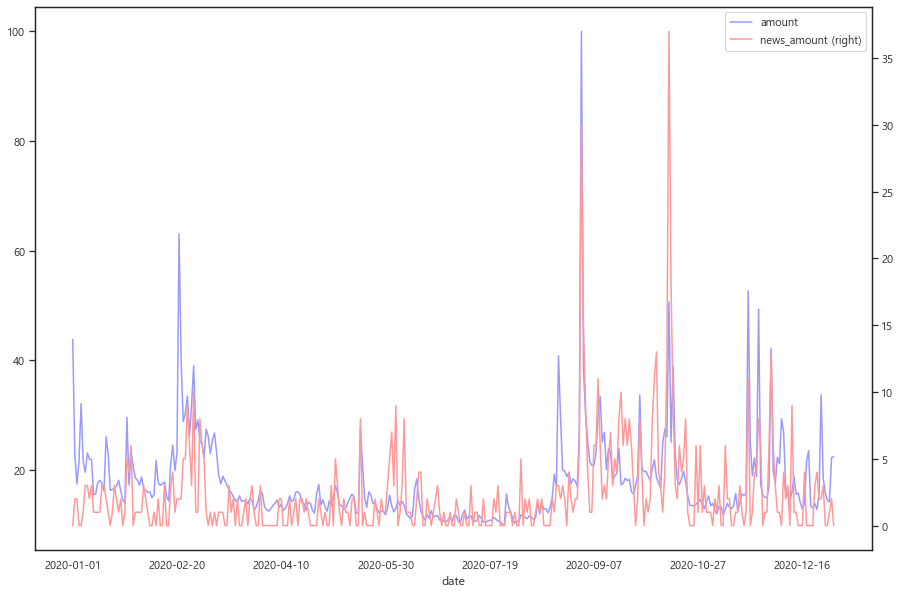

In [20]:
# plot data
fig, ax = plt.subplots(figsize=(15,10))
search_data.plot(ax=ax, x='date', secondary_y = ['news_amount'], color = ['#9999ff','#ff9999'])

검색양과 기사의 분포가 유사하다는 것을 확인할 수 있습니다.